# Decision Tree vs Random Forest on Kyphosis Dataset

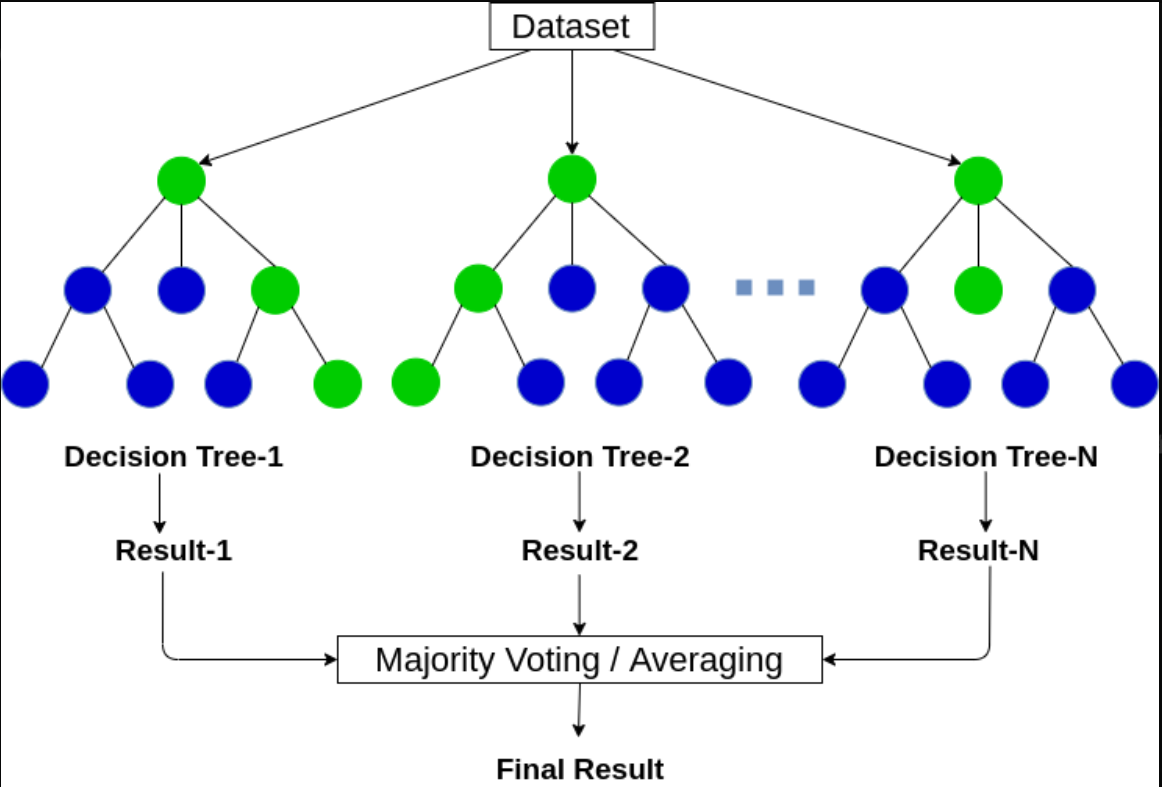

Check out this [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) for reference. Has a very good description of this topic! Also, this [blog post](https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/) as well.

Import Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data import:

In [ ]:
df = pd.read_csv('../input/kyphosis-dataset/kyphosis.csv')

In [ ]:
df.head()

Columns are:
- kyphosis: present or absent after operation
- age: in months (children only) at time of operation
- number: of vertebrae involved in the operation
- start: number of top-most vertebrae that was operated on

In [ ]:
df.info()

No missing records, so we can proceed!

## EDA

In [ ]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Data pre-processing: Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Kyphosis',axis=1) # features
y = df['Kyphosis'] # target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# 1. Decision Tree

Training a decision tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

Prediction and Evaluation:

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

**Observation:** Only 7 incorrect labelings (2+5)!

**Tree Visualization**

Using Scikit-learn toolboxes:

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# 2. Random Forest

Training a random forest now:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

Prediction and Evaluation:

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

**Obs:** Only 4 incorrect labellings this time!

In [ ]:
print(classification_report(y_test,rfc_pred))

# 3. Conclusion

The performance is comparable in this case (on a smaller dataset), with an overall advantage to the Random Forest, however decision trees have higher variance in general and feature importance matters.

Note that the 'present' precision is 100%, and this is what we want in case of **disease diagnosis**!

Random Forest works even better for larger datasets (this is a small one- only 81 records, so the decision tree had an easier time to pick the best **Information Gain** from the first split).